In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Road Accident Data.csv')

# Preview the data
df.head()


,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [2]:
# Check basic info (data types, nulls, etc.)
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
count,307973,307973,307973,307973,307973,307973,307973.000000,307973,307973,5424,...,307973.000000,307973.000000,307973,307973,307973,307973.000000,307956,307973,307973,307973
unique,307973,730,7,7,9,4,NaN,5,422,5,...,NaN,NaN,51,5,5,NaN,1439,2,8,15
top,BS0307973,11/13/2021,Friday,Give way or uncontrolled,Not at junction or within 20 metres,Slight,NaN,Daylight,Birmingham,Other object on road,...,NaN,NaN,Metropolitan Police,Dry,Single carriageway,NaN,17:00,Urban,Fine no high winds,Car
freq,1,692,50529,150045,123094,263280,NaN,227286,6165,2243,...,NaN,NaN,46789,208967,230612,NaN,2933,198532,244496,239794
mean,NaN,NaN,NaN,NaN,NaN,NaN,52.487005,NaN,NaN,NaN,...,1.356882,1.829063,NaN,NaN,NaN,38.866037,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.339011,NaN,NaN,NaN,...,0.815857,0.710477,NaN,NaN,NaN,14.032933,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,49.914488,NaN,NaN,NaN,...,1.000000,1.000000,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,51.485248,NaN,NaN,NaN,...,1.000000,1.000000,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,52.225943,NaN,NaN,NaN,...,1.000000,2.000000,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,53.415517,NaN,NaN,NaN,...,1.000000,2.000000,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN


In [4]:
# Drop rows with missing 'Accident Date', 'Accident_Severity', or 'Location'-like columns
# Here, 'Accident Date' and 'Accident_Severity' are essential
df.dropna(subset=['Accident Date', 'Accident_Severity'], inplace=True)

# Convert 'Accident Date' to datetime format
df['Accident Date'] = pd.to_datetime(df['Accident Date'], format='%m/%d/%Y', errors='coerce')

# If there are invalid dates that become NaT, drop them
df.dropna(subset=['Accident Date'], inplace=True)

# Extract useful time components
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month
df['DayOfWeek'] = df['Day_of_Week']  # already a column


In [5]:
# Some values in 'Time' might be missing; drop or handle them
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')

# Extract hour from time
df['Hour'] = df['Time'].dt.hour


In [6]:
# Top 10 districts with the highest accident count
high_risk_locations = df['Local_Authority_(District)'].value_counts().head(10)

# Display as a DataFrame
high_risk_df = high_risk_locations.reset_index()
high_risk_df.columns = ['District', 'Accident Count']
high_risk_df


,District,Accident Count
0,Birmingham,6165
1,Leeds,4140
2,Manchester,3132
3,Bradford,3006
4,Westminster,2811
5,Sheffield,2750
6,Liverpool,2611
7,Cornwall,2606
8,Barnet,2302
9,"Bristol, City of",2270


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15808\3095442440.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_risk_df, x='Accident Count', y='District', palette='Reds_r')


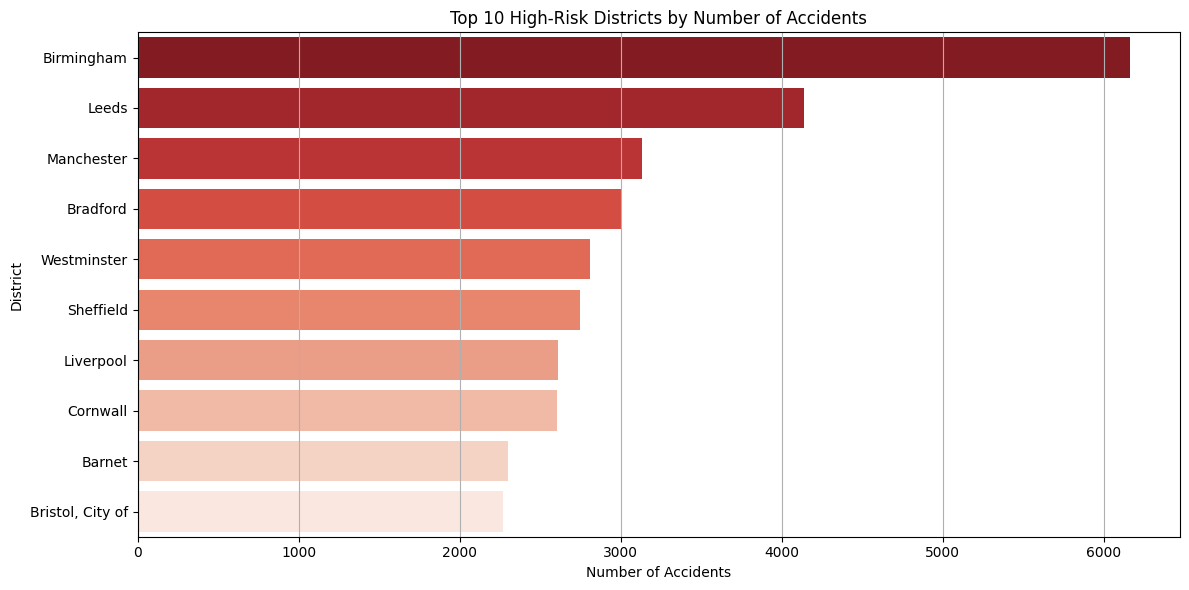

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
plt.figure(figsize=(12, 6))
sns.barplot(data=high_risk_df, x='Accident Count', y='District', palette='Reds_r')
plt.title('Top 10 High-Risk Districts by Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('District')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [8]:
severity_by_location = df.groupby(['Local_Authority_(District)', 'Accident_Severity']).size().unstack().fillna(0)
severity_by_location.head(10)  # View top 10 rows


Accident_Severity,Fatal,Fetal,Serious,Slight
Local_Authority_(District),,,,
Aberdeen City,3.0,0.0,72.0,370.0
Aberdeenshire,21.0,0.0,184.0,482.0
Adur,7.0,0.0,48.0,229.0
Allerdale,9.0,0.0,64.0,451.0
Alnwick,2.0,0.0,1.0,17.0
Amber Valley,8.0,0.0,75.0,546.0
Angus,7.0,0.0,49.0,176.0
Argyll and Bute,4.0,0.0,66.0,210.0
Arun,6.0,0.0,124.0,523.0


In [10]:
# Export the enhanced data for Power BI or Excel
df.to_csv('Cleaned_Road_Accident_Data.csv', index=False)
